<a href="https://colab.research.google.com/github/Meet4021/Meet-project/blob/main/Bank_Marketing_Campaign_Predictive_Analytics_Project_final_dhruv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bank Marketing Campaign Predictive Analytics Project

# 1) Problem Statement

There has been a revenue decline for the Portuguese bank and they would like to know what actions to take. After investigation, we found out that the root cause is that their clients are not depositing as frequently as before. Knowing that term deposits allow banks to hold onto a deposit for a specific amount of time, so banks can invest in higher gain financial products to make a profit. In addition, banks also hold better chance to persuade term deposit clients into buying other products such as funds or insurance to further increase their revenues. As a result, the Portuguese bank would like to identify existing clients that have higher chance to subscribe for a term deposit and focus marketing effort on such clients.

# 2) Data Pre-Processing

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
bank = pd.read_csv("bank-additional-full.csv",sep=';')

In [ ]:
bank.head()

age        job  marital    education  default housing loan    contact month  \
0  56  housemaid  married     basic.4y       no      no   no  telephone   may   
1  57   services  married  high.school  unknown      no   no  telephone   may   
2  37   services  married  high.school       no     yes   no  telephone   may   
3  40     admin.  married     basic.6y       no      no   no  telephone   may   
4  56   services  married  high.school       no      no  yes  telephone   may   

  day_of_week  ... campaign  pdays  previous     poutcome emp.var.rate  \
0         mon  ...      1.0  999.0       0.0  nonexistent          1.1   
1         mon  ...      1.0  999.0       0.0  nonexistent          1.1   
2         mon  ...      1.0  999.0       0.0  nonexistent          1.1   
3         mon  ...      1.0  999.0       0.0  nonexistent          1.1   
4         mon  ...      1.0  999.0       0.0  nonexistent          1.1   

   cons.price.idx cons.conf.idx  euribor3m  nr.employed   y  
0          93.994         -36.4      4.857       5191.0  no  
1          93.994         -36.4      4.857       5191.0  no  
2          93.994         -36.4      4.857       5191.0  no  
3          93.994         -36.4      4.857       5191.0  no  
4          93.994         -36.4      4.857       5191.0  no  

[5 rows x 21 columns]

In [ ]:
bank.shape

(41188, 21)

In [ ]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [ ]:
bank.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [ ]:
bank.describe()

age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  41188.000000    41188.000000   41188.000000  41188.000000  41188.000000  
mean       0.081886       93.575664     -40.502600      3.621291   5167.035911  
std        1.570960        0.578840       4.628198      1.734447     72.251528  
min       -3.400000       92.201000     -50.800000      0.634000   4963.600000  
25%       -1.800000       93.075000     -42.700000      1.344000   5099.100000  
50%        1.100000       93.749000     -41.800000      4.857000   5191.000000  
75%        1.400000       93.994000     -36.400000      4.961000   5228.100000  
max        1.400000       94.767000     -26.900000      5.045000   5228.100000

In [ ]:
bank.duplicated().sum()

12

In [ ]:
bank.drop_duplicates(keep=False, inplace=True)

In [ ]:
bank.shape

(41164, 21)

# 3) Exploratory Data Analysis

# i) Pandas-Profiling

In [ ]:
!pip install pandas-profiling
from pandas_profiling import ProfileReport
prof = ProfileReport (bank, title="Pandas-Profiling.html", html={'style': {'fullwidth' : True}})
prof

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.3/356.3 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 6.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.4/455.4 kB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 27.6 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27079 sha256=1c10301bb9be6c9d983297213e0162c8febf490bdcd741c3e2cc9e2a0e05a61f
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: wordcloud
    Found existing installation: wordcloud 1.8.2.2
    Uninstalling wordc

<ipython-input-28-1364477865d4>:2: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# ii) Data Visualisation

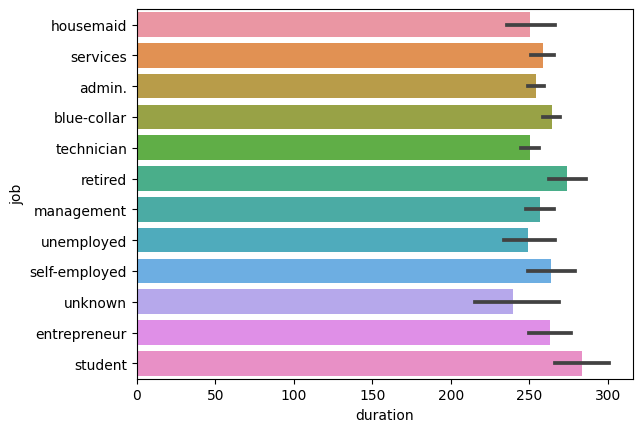

In [ ]:
sns.barplot( x = 'duration',
             y = 'job',
             data = bank )
plt.show()

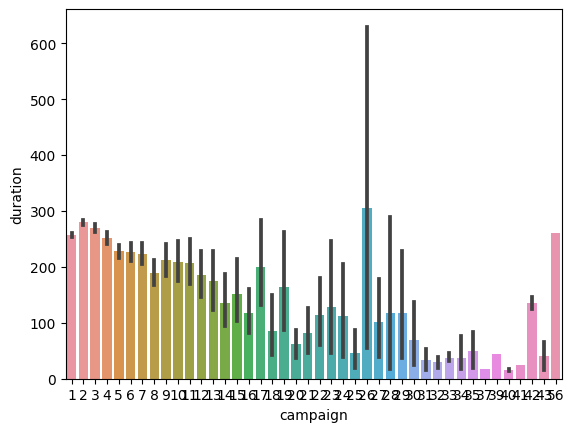

In [ ]:
sns.barplot( x = 'campaign',
             y = 'duration',
             data = bank )
plt.show()

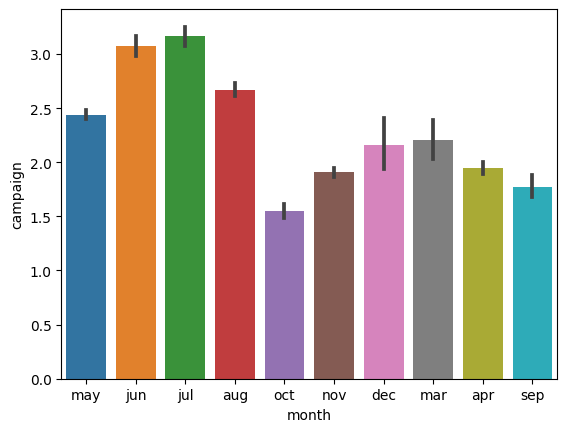

In [ ]:
sns.barplot( x = 'month',
             y = 'campaign',
             data = bank )
plt.show()

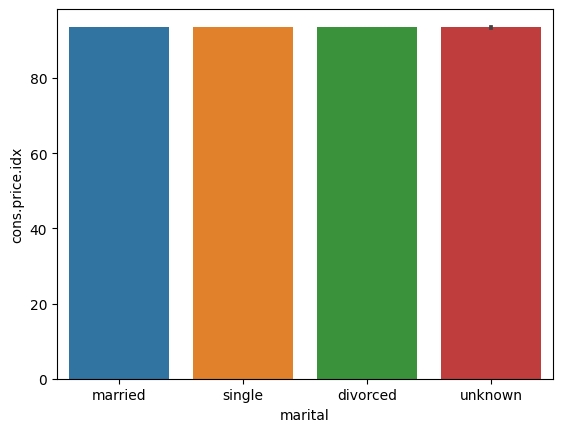

In [ ]:
sns.barplot(x = bank["marital"], y = bank["cons.price.idx"] )
plt.show()

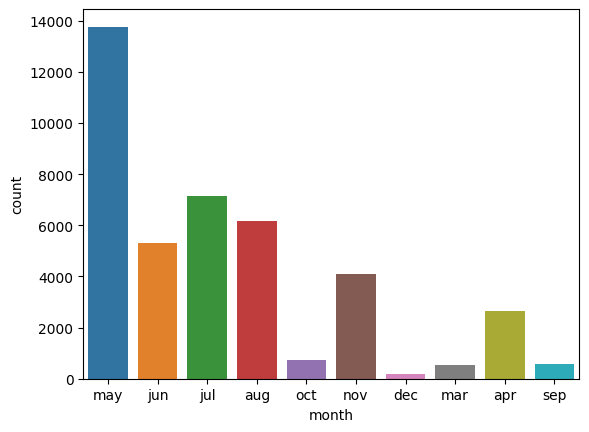

In [ ]:
sns.countplot(x ='month', data=bank)
plt.show()

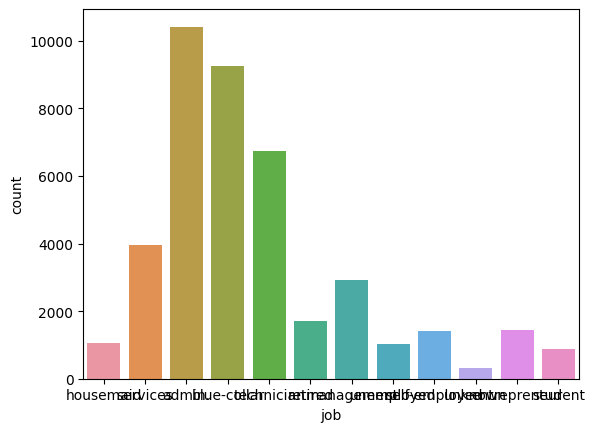

In [ ]:
sns.countplot (x= 'job', data =bank)
plt.show()

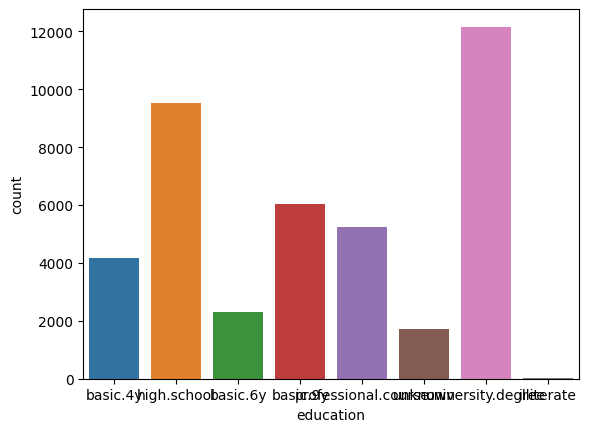

In [ ]:
sns.countplot(x = 'education', data = bank)
plt.show()

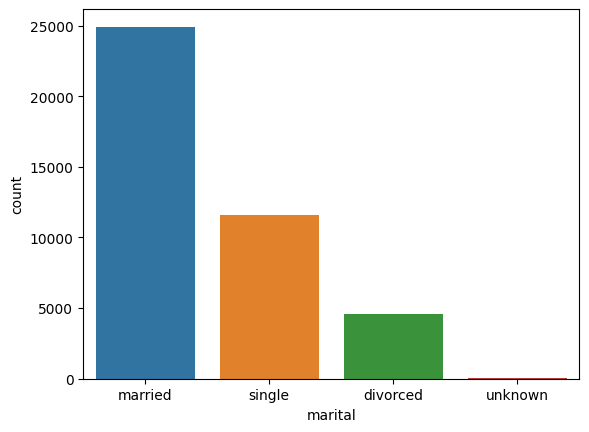

In [ ]:
sns.countplot(x ='marital', data = bank)
plt.show()

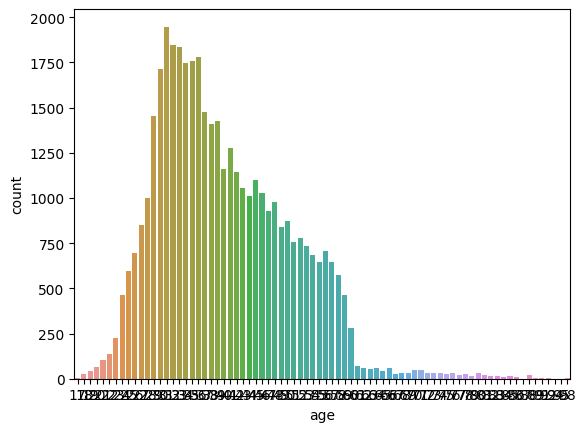

In [ ]:
sns.countplot(x = 'age', data = bank)
plt.show()

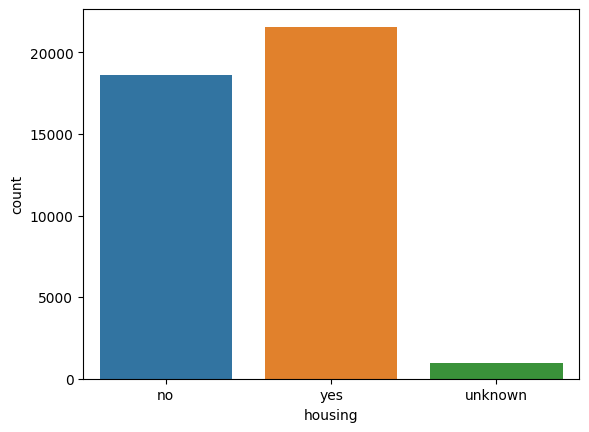

In [ ]:
sns.countplot(x = 'housing', data = bank)
plt.show()

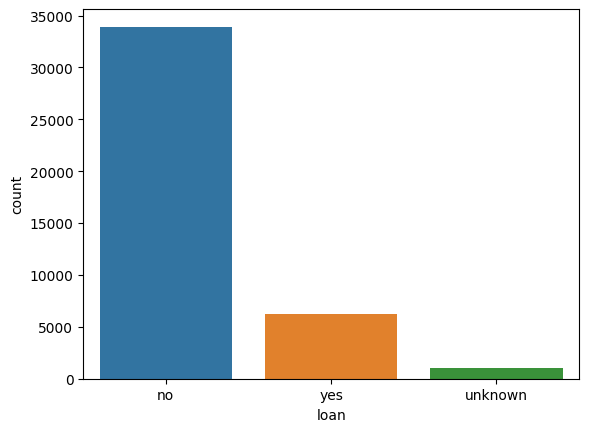

In [ ]:
sns.countplot(x = 'loan', data = bank)
plt.show()

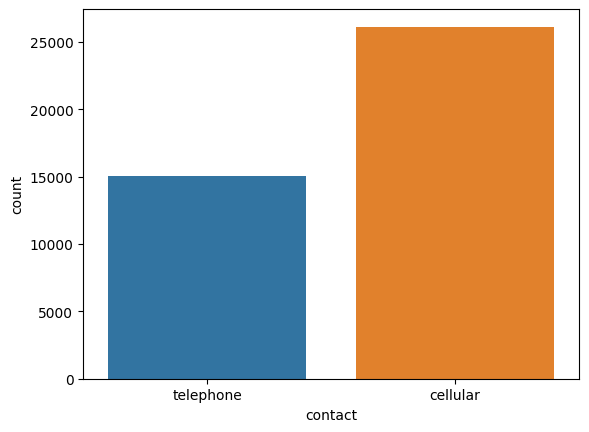

In [ ]:
sns.countplot(x = 'contact', data = bank)
plt.show()

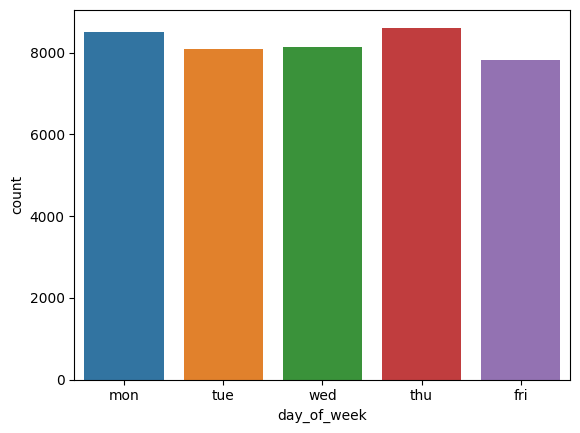

In [ ]:
sns.countplot(x = 'day_of_week', data = bank)
plt.show()

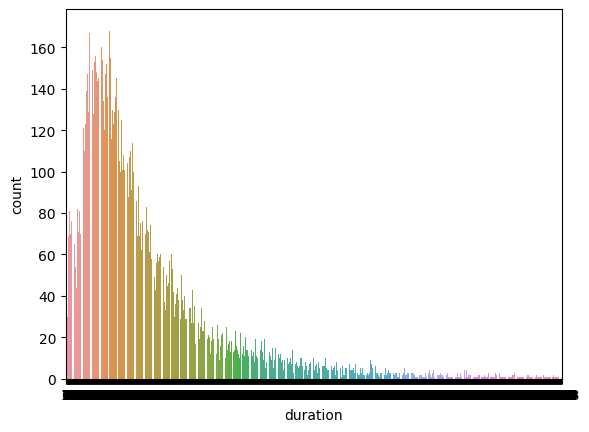

In [ ]:
sns.countplot(x = 'duration', data = bank)
plt.show()

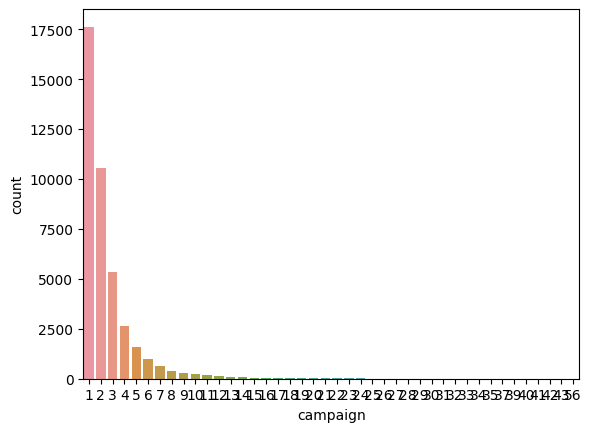

In [ ]:
sns.countplot(x = 'campaign', data = bank)
plt.show()

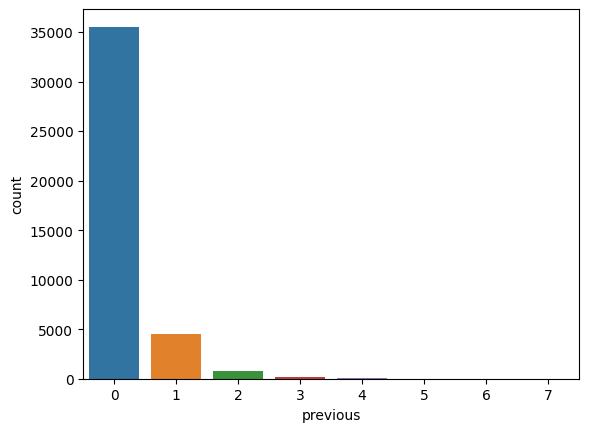

In [ ]:
sns.countplot(x = 'previous', data = bank)
plt.show()

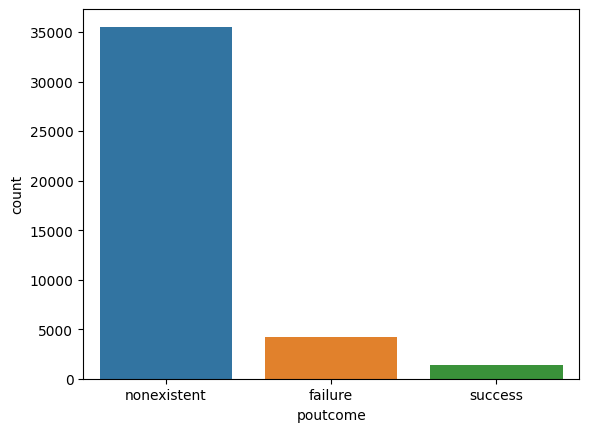

In [ ]:
sns.countplot(x = 'poutcome', data = bank)
plt.show()

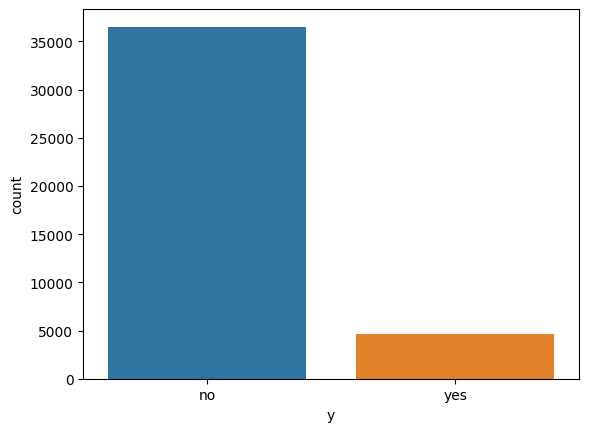

In [ ]:
sns.countplot(x = 'y', data = bank)
plt.show()

<ipython-input-47-ddf5ef59cb82>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plot=sns.heatmap(bank.corr(),annot=True,linewidths=0.7,linecolor= "black",fmt=".1f")


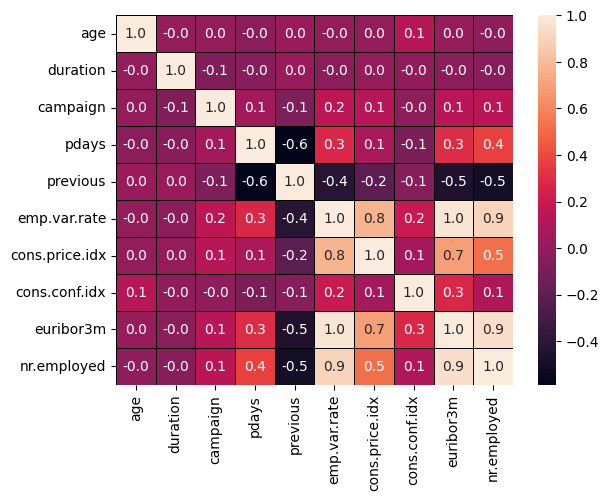

In [ ]:
plot=sns.heatmap(bank.corr(),annot=True,linewidths=0.7,linecolor= "black",fmt=".1f")
plt.show()

# 4) Feature Engineering

# i) Removal of Outlier

ValueError: ignored

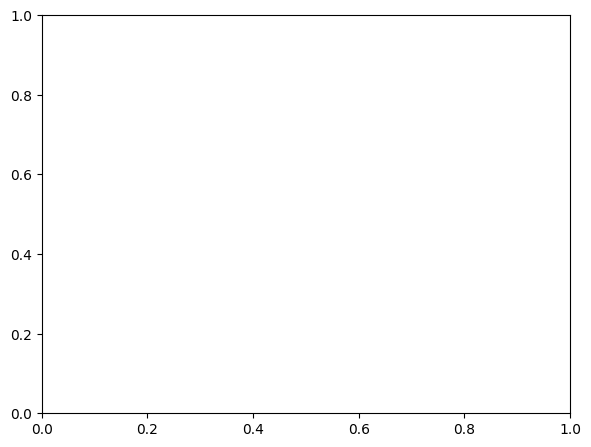

In [ ]:
plt.figure(figsize = (15, 30))

Plot1=plt.subplot(5,2,1)
sns.boxplot(bank['age'])
Plot1.set_title('Age')

Plot2=plt.subplot(5,2,2)
sns.boxplot(bank['duration'])
Plot2.set_title('Duration')

Plot3=plt.subplot(5,2,3)
sns.boxplot(bank['campaign'])
Plot3.set_title('Campaign')

Plot4=plt.subplot(5,2,4)
sns.boxplot(bank['pdays'])
Plot4.set_title('Pdays')

Plot5=plt.subplot(5,2,5)
sns.boxplot(bank['previous'])
Plot5.set_title('Previous')

Plot6=plt.subplot(5,2,6)
sns.boxplot(bank['emp.var.rate'])
Plot6.set_title('Employment Variation Rate')

Plot7=plt.subplot(5,2,7)
sns.boxplot(bank['cons.price.idx'])
Plot7.set_title('Consumer Price Index')

Plot8=plt.subplot(5,2,8)
sns.boxplot(bank['cons.conf.idx'])
Plot8.set_title('Consumer confidence index')

Plot9=plt.subplot(5,2,9)
sns.boxplot(bank['euribor3m'])
Plot9.set_title('Euribor3m')

Plot10=plt.subplot(5,2,10)
sns.boxplot(bank['nr.employed'])
Plot10.set_title('No of Employees')

plt.show()

In [ ]:
numerical_features=['age','campaign','duration','pdays','previous','cons.conf.idx']
for cols in numerical_features:
    Q1 = bank[cols].quantile(0.25)
    Q3 = bank[cols].quantile(0.75)
    IQR = Q3 - Q1

    filter = (bank[cols] >= Q1 - 1.5 * IQR) & (bank[cols] <= Q3 + 1.5 *IQR)
    bank=bank.loc[filter]

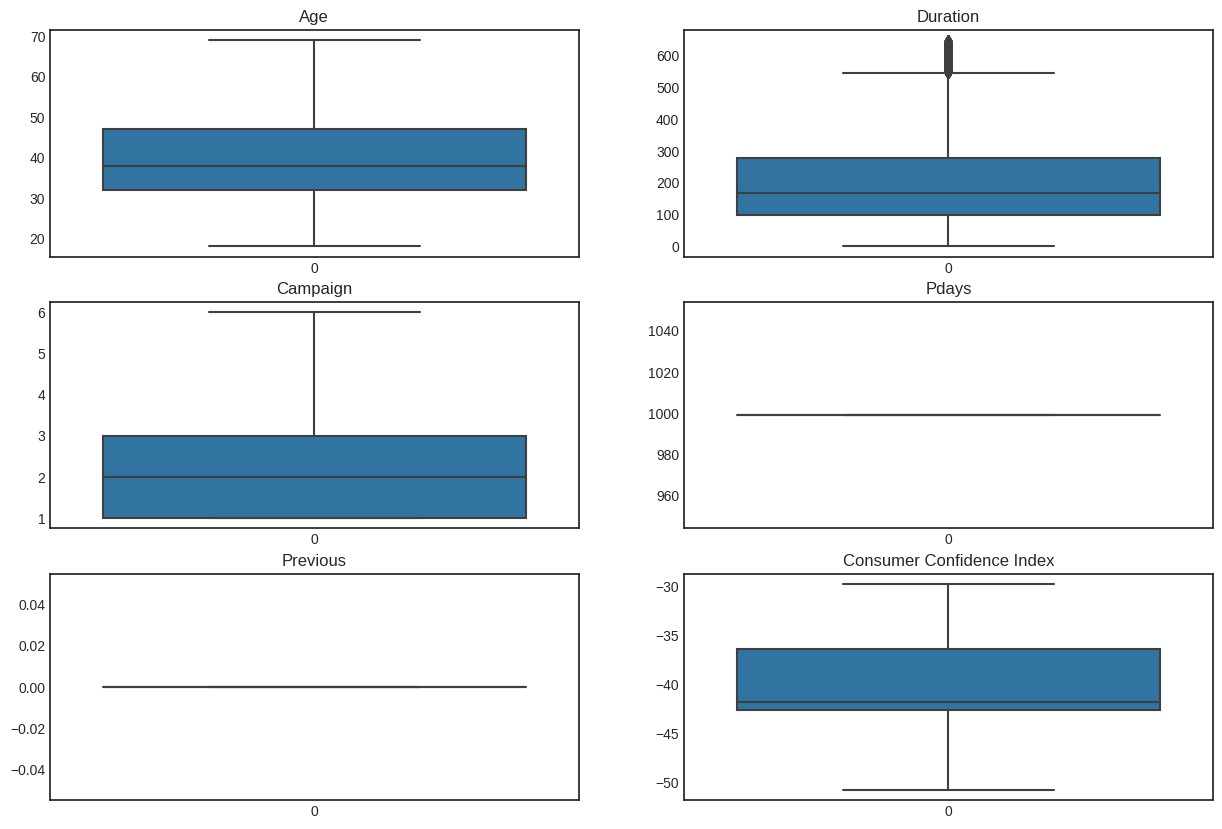

In [ ]:
plt.figure(figsize = (15, 10))

Plot1=plt.subplot(3,2,1)
sns.boxplot(bank['age'])
Plot1.set_title('Age')

Plot2=plt.subplot(3,2,2)
sns.boxplot(bank['duration'])
Plot2.set_title('Duration')

Plot3=plt.subplot(3,2,3)
sns.boxplot(bank['campaign'])
Plot3.set_title('Campaign')

Plot4=plt.subplot(3,2,4)
sns.boxplot(bank['pdays'])
Plot4.set_title('Pdays')

Plot5=plt.subplot(3,2,5)
sns.boxplot(bank['previous'])
Plot5.set_title('Previous')

Plot6=plt.subplot(3,2,6)
sns.boxplot(bank['cons.conf.idx'])
Plot6.set_title('Consumer Confidence Index')

plt.show()

# ii) Handling Categorical Data

In [ ]:
bank_data=bank.copy()

In [ ]:
#bank_data = pd.get_dummies (bank_data, columns =["job"],drop_first = True)

In [ ]:
#bank_data = pd.get_dummies (bank_data, columns =["marital"],drop_first = True)

In [ ]:
#bank_data = pd.get_dummies (bank_data, columns =["education"],drop_first = True)

In [ ]:
dictionary= {'yes': 1, 'no': 0, 'unknown': -1}

bank_data["default"] = bank_data["default"].map(dictionary)
bank_data["housing"] = bank_data["housing"].map(dictionary)
bank_data["loan"] = bank_data["loan"].map(dictionary)

In [ ]:
bank["y"].value_counts()

no     28698
yes     1663
Name: y, dtype: int64

In [ ]:
dictionary= {'yes': 1, 'no': 0}

bank_data["y"] = bank_data["y"].map(dictionary)

In [ ]:
#bank_data = pd.get_dummies (bank_data, columns =["contact"],drop_first = True)

In [ ]:
#bank_data = pd.get_dummies (bank_data, columns =["poutcome"],drop_first = True)

In [ ]:
bank["job"].value_counts()

admin.           10416
blue-collar       9252
technician        6735
services          3965
management        2924
retired           1716
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [ ]:
bank_data.replace({"admin.":1,"blue-collar":2,"technician":3,"services":4,"management":5,"entrepreneur":6,"self-employed":7,"retired":8,"housemaid":9,"unemployed":10,"student":11, "unknown":12 }, inplace=True)

In [ ]:
bank["marital"].value_counts()

married     24914
single      11560
divorced     4610
unknown        80
Name: marital, dtype: int64

In [ ]:
bank_data.replace({"married" : 1,"single":0, "divorced" :3, "unknown" :4}, inplace=True)

In [ ]:
bank["education"].value_counts()

university.degree      12160
high.school             9509
basic.9y                6045
professional.course     5237
basic.4y                4176
basic.6y                2290
unknown                 1729
illiterate                18
Name: education, dtype: int64

In [ ]:
bank_data.replace({"basic.4y":"middle.school","basic.6y":"middle.school","basic.9y":"middle.school"}, inplace=True)

In [ ]:
bank_data.replace({"middle.school": 0,"university.degree":1,"high.school": 2,"professional.course":3, "illiterate" : 4}, inplace=True)

In [ ]:
bank["default"].value_counts()

no         32566
unknown     8595
yes            3
Name: default, dtype: int64

In [ ]:
bank["housing"].value_counts()

yes        21566
no         18608
unknown      990
Name: housing, dtype: int64

In [ ]:
bank["loan"].value_counts()

no         33926
yes         6248
unknown      990
Name: loan, dtype: int64

In [ ]:
bank_data.replace({"no" :0, "unknown" : 2, "yes" :1}, inplace =True)

In [ ]:
bank["contact"].value_counts()

cellular     26126
telephone    15038
Name: contact, dtype: int64

In [ ]:
bank_data.replace({ "telephone" : 0, "cellular" : 1}, inplace = True)

In [ ]:
bank["poutcome"].value_counts()

nonexistent    35539
failure         4252
success         1373
Name: poutcome, dtype: int64

In [ ]:
bank_data.replace({"nonexistent" : 0}, inplace = True)

In [ ]:
bank["day_of_week"].value_counts()

thu    8613
mon    8510
wed    8134
tue    8082
fri    7825
Name: day_of_week, dtype: int64

In [ ]:
bank_data.replace({"mon":0,"thu":3,"tue":1,"wed":2,"fri":4}, inplace=True)

In [ ]:
bank["month"].value_counts()

may    13765
jul     7164
aug     6174
jun     5318
nov     4099
apr     2630
oct      716
sep      570
mar      546
dec      182
Name: month, dtype: int64

In [ ]:
bank_data.replace({"may" :5, "jul":7, "aug":8, "jun": 6, "nov":11,"apr":4,"mar":3,"sep":9,"oct":10,"dec":12}, inplace=True)

In [ ]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41164 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41164 non-null  int64  
 1   job             41164 non-null  object 
 2   marital         41164 non-null  object 
 3   education       41164 non-null  object 
 4   default         41164 non-null  object 
 5   housing         41164 non-null  object 
 6   loan            41164 non-null  object 
 7   contact         41164 non-null  object 
 8   month           41164 non-null  object 
 9   day_of_week     41164 non-null  object 
 10  duration        41164 non-null  int64  
 11  campaign        41164 non-null  int64  
 12  pdays           41164 non-null  int64  
 13  previous        41164 non-null  int64  
 14  poutcome        41164 non-null  object 
 15  emp.var.rate    41164 non-null  float64
 16  cons.price.idx  41164 non-null  float64
 17  cons.conf.idx   41164 non-null 

In [ ]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30361 entries, 0 to 41186
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             30361 non-null  int64  
 1   job             30361 non-null  int64  
 2   marital         30361 non-null  int64  
 3   education       30361 non-null  int64  
 4   default         30361 non-null  int64  
 5   housing         30361 non-null  int64  
 6   loan            30361 non-null  int64  
 7   contact         30361 non-null  int64  
 8   month           30361 non-null  int64  
 9   day_of_week     30361 non-null  int64  
 10  duration        30361 non-null  int64  
 11  campaign        30361 non-null  int64  
 12  pdays           30361 non-null  int64  
 13  previous        30361 non-null  int64  
 14  poutcome        30361 non-null  int64  
 15  emp.var.rate    30361 non-null  float64
 16  cons.price.idx  30361 non-null  float64
 17  cons.conf.idx   30361 non-null 

In [ ]:
bank_data.head()

age  job  marital  education  default  housing  loan  contact  month  \
0   56    9        1          0        0        0     0        0      5   
1   57    4        1          2       12        0     0        0      5   
2   37    4        1          2        0        1     0        0      5   
3   40    1        1          0        0        0     0        0      5   
4   56    4        1          2        0        0     1        0      5   

   day_of_week  ...  campaign  pdays  previous  poutcome  emp.var.rate  \
0            0  ...         1    999         0         0           1.1   
1            0  ...         1    999         0         0           1.1   
2            0  ...         1    999         0         0           1.1   
3            0  ...         1    999         0         0           1.1   
4            0  ...         1    999         0         0           1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed  y  
0          93.994          -36.4      4.857       5191.0  0  
1          93.994          -36.4      4.857       5191.0  0  
2          93.994          -36.4      4.857       5191.0  0  
3          93.994          -36.4      4.857       5191.0  0  
4          93.994          -36.4      4.857       5191.0  0  

[5 rows x 21 columns]

# iii) Standardization Scaling

In [ ]:
import sklearn

from sklearn.preprocessing import StandardScaler

In [ ]:
bank_scale=bank_data.copy()
Categorical_variables=['job', 'education', 'default', 'housing', 'loan', 'month',
       'day_of_week','y', 'contact','poutcome', 'marital']


feature_scale=[feature for feature in bank_scale.columns if feature not in Categorical_variables]


scaler=StandardScaler()
scaler.fit(bank_scale[feature_scale])

StandardScaler()

In [ ]:
scaled_data = pd.concat([bank_scale[['job', 'education', 'default', 'housing', 'loan', 'month',
       'day_of_week','y', 'poutcome','contact',
       'marital']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(bank_scale[feature_scale]), columns=feature_scale)],
                    axis=1)
scaled_data.head()

job  education  default  housing  loan  month  day_of_week  y  poutcome  \
0    9          0        0        0     0      5            0  0         0   
1    4          2       12        0     0      5            0  0         0   
2    4          2        0        1     0      5            0  0         0   
3    1          0        0        0     0      5            0  0         0   
4    4          2        0        0     1      5            0  0         0   

   contact  ...       age  duration  campaign  pdays  previous  emp.var.rate  \
0        0  ...  1.722366  0.395851 -0.830399    0.0       0.0      0.501903   
1        0  ...  1.827842 -0.400157 -0.830399    0.0       0.0      0.501903   
2        0  ... -0.281661  0.147098 -0.830399    0.0       0.0      0.501903   
3        0  ...  0.034765 -0.385943 -0.830399    0.0       0.0      0.501903   
4        0  ...  1.722366  0.722783 -0.830399    0.0       0.0      0.501903   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed  
0        0.645118       0.963029   0.569846     0.149646  
1        0.645118       0.963029   0.569846     0.149646  
2        0.645118       0.963029   0.569846     0.149646  
3        0.645118       0.963029   0.569846     0.149646  
4        0.645118       0.963029   0.569846     0.149646  

[5 rows x 21 columns]

# 5) Feature Selection

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

In [ ]:
X=scaled_data.drop(['y'],axis=1)
y=scaled_data.y

model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

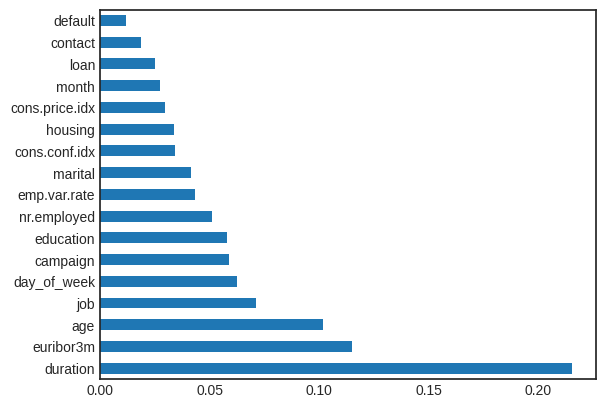

In [ ]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(17).plot(kind='barh')
plt.show()

# Train & Test Split (80:20)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X=scaled_data.drop(['pdays','month','cons.conf.idx','loan','housing','y'],axis=1)
y=scaled_data.y

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.8,random_state=1)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(24288, 15)
(6073, 15)


# Import Some of Libraries

In [ ]:

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.model_selection import cross_val_score

# 6) Machine Learning Model

In [ ]:
logreg_cv = LogisticRegression(random_state=0)
dt_cv=DecisionTreeClassifier()
knn_cv=KNeighborsClassifier()
svc_cv=SVC()
rfc_cv=RandomForestClassifier()
cv_dict = {0: 'Logistic Regression', 1: 'Decision Tree',2:'KNN',3:'SVC',4:'Naive Bayes',5:'Random Forest'}
cv_models=[logreg_cv,dt_cv,knn_cv,svc_cv,rfc_cv]


for i,model in enumerate(cv_models):
    print("{} Test Accuracy: {}".format(cv_dict[i],cross_val_score(model, X, y, cv=10, scoring ='accuracy').mean()))

Logistic Regression Test Accuracy: 0.9180848151671762
Decision Tree Test Accuracy: 0.6508911067410589
KNN Test Accuracy: 0.9065235503450417
SVC Test Accuracy: 0.8676566201737638
Naive Bayes Test Accuracy: 0.7961151181974792
Random Forest Test Accuracy: 0.665910902123698


In [ ]:
param_grid = {'C': np.logspace(-4, 4, 50),
             'penalty':['l1', 'l2']}
clf = GridSearchCV(LogisticRegression(random_state=0), param_grid,cv=5, verbose=0,n_jobs=-1)
best_model = clf.fit(X_train,y_train)
print(best_model.best_estimator_)
print("The mean accuracy of the model is:",best_model.score(X_test,y_test))

LogisticRegression(C=1.2067926406393288, random_state=0)
The mean accuracy of the model is: 0.9473077556397168


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
250 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
250 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: So

In [ ]:
logreg = LogisticRegression(C=0.18420699693267145, random_state=0)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.95


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n",confusion_matrix)
print("Classification Report:\n",classification_report(y_test, y_pred))

Confusion Matrix:
 [[5679   57]
 [ 264   73]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97      5736
           1       0.56      0.22      0.31       337

    accuracy                           0.95      6073
   macro avg       0.76      0.60      0.64      6073
weighted avg       0.93      0.95      0.94      6073



In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')

plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.show()

NameError: ignored

In [ ]:
svc_classifier = SVC(random_state = 0)
svc_classifier.fit(X_train,y_train)
y_pred=svc_classifier.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Classification Report:\n",classification_report(y_test,y_pred))

Accuracy: 0.9459904495307097
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97      5736
           1       0.62      0.07      0.13       337

    accuracy                           0.95      6073
   macro avg       0.78      0.53      0.55      6073
weighted avg       0.93      0.95      0.93      6073



# Hyperparameter Tuning

In [ ]:
#from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

#grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

# fitting the model for grid search
#grid.fit(X_train, y_train)

In [ ]:
# print best parameter after tuning
print(grid.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

In [ ]:
grid_predictions = grid.predict(X_test)

# print classification report
print(classification_report(y_test, grid_predictions))

In [ ]:
rfc = RandomForestClassifier (n_estimators = 100)
rfc.fit (X_train, y_train)

RandomForestClassifier()

In [ ]:
predict = rfc.predict (X_test)
acc = accuracy_score (predict, y_test)
pre = precision_score (predict, y_test)
rec = recall_score (predict, y_test)
f1 = f1_score (predict, y_test)

In [ ]:

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Classification Report:\n",classification_report(y_test,y_pred))

Accuracy: 0.9459904495307097
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97      5736
           1       0.62      0.07      0.13       337

    accuracy                           0.95      6073
   macro avg       0.78      0.53      0.55      6073
weighted avg       0.93      0.95      0.93      6073



In [ ]:
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier()
randomforest.fit(X_train, y_train)
y_pred = randomforest.predict(X_test)

AUC_RF=roc_auc_score(y_pred,y_test)
acc_rf=accuracy_score(y_test,y_pred)
recall_rf=recall_score(y_test,y_pred)
precision_rf=precision_score(y_test,y_pred)
f1score_rf=f1_score(y_test,y_pred)
print("ROC_AUC Score:",AUC_RF)

cm=confusion_matrix(y_test,y_pred)
print(cm)

sns.heatmap(cm,annot=True)

ROC_AUC Score: 0.7542343161805399


TypeError: ignored

In [ ]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97      5887
           1       0.30      0.55      0.39       186

    accuracy                           0.95      6073
   macro avg       0.64      0.75      0.68      6073
weighted avg       0.96      0.95      0.95      6073



In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score

In [ ]:
rf = RandomForestClassifier()
gb = GradientBoostingClassifier()
svc = SVC()
lr = LogisticRegression()
dt = DecisionTreeClassifier()

In [ ]:
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
accuracy_score(y_test,y_pred)

0.9323233986497612

In [ ]:
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.9481310719578462

In [ ]:
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)

accuracy_score(y_test,y_pred)

SyntaxError: ignored

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Classification Report:\n",classification_report(y_test,y_pred))

Accuracy: 0.9323233986497612
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.96      5736
           1       0.39      0.41      0.40       337

    accuracy                           0.93      6073
   macro avg       0.68      0.69      0.68      6073
weighted avg       0.93      0.93      0.93      6073



In [ ]:
gb.fit(X_train,y_train)
y_pred = gb.predict(X_test)
accuracy_score(y_test,y_pred)

0.9487897250123497

In [ ]:
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
accuracy_score(y_test,y_pred)

0.9474724189033427

In [ ]:
rf = RandomForestClassifier(max_samples=0.75,random_state=42)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.948295735221472

In [ ]:
from sklearn.model_selection import cross_val_score
np.mean(cross_val_score(RandomForestClassifier(max_samples=0.75),X,y,cv=10,scoring='accuracy'))

0.6652192025189548

In [ ]:
# Number of trees in random forest
n_estimators = [20,60,100,120]

# Number of features to consider at every split
max_features = [0.2,0.6,1.0]

# Maximum number of levels in tree
max_depth = [2,8,None]

# Number of samples
max_samples = [0.5,0.75,1.0]

# Bootstrap samples
bootstrap = [True,False]

# Minimum number of samples required to split a node
min_samples_split = [2, 5]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
              'max_samples':max_samples,
              'bootstrap':bootstrap,
              'min_samples_split':min_samples_split,
              'min_samples_leaf':min_samples_leaf
             }
print(param_grid)

{'n_estimators': [20, 60, 100, 120], 'max_features': [0.2, 0.6, 1.0], 'max_depth': [2, 8, None], 'max_samples': [0.5, 0.75, 1.0], 'bootstrap': [True, False], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2]}


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

rf_grid = RandomizedSearchCV(estimator = rf,
                       param_distributions = param_grid,
                       cv = 5,
                       verbose=2,
                       n_jobs = -1)
rf_grid.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
35 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 397, in fit
    raise ValueError(
ValueError: `max_sample` cannot be set if `bootstrap=False`. Either switch to `bootstrap=True` or set `max_sample=None`.

  warnings.warn(some_fits_failed_message, FitFailedWarning)
/usr/local/lib/py

RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(max_samples=0.75,
                                                    random_state=42),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [2, 8, None],
                                        'max_features': [0.2, 0.6, 1.0],
                                        'max_samples': [0.5, 0.75, 1.0],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [20, 60, 100, 120]},
                   verbose=2)

In [ ]:
rf_grid.best_params_

rf_grid.best_score_

0.9522398226155658